https://towardsdatascience.com/solving-a-simple-classification-problem-with-python-fruits-lovers-edition-d20ab6b071d2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
from pandas.plotting import scatter_matrix
from matplotlib import cm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
fruits = pd.read_table("~/fruits.txt")
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [3]:
print(fruits.shape)
print(fruits.fruit_name.unique()) # temos 4 tipos de frutas

(59, 7)
['apple' 'mandarin' 'orange' 'lemon']


In [4]:
print(fruits.groupby('fruit_name').size())

fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64


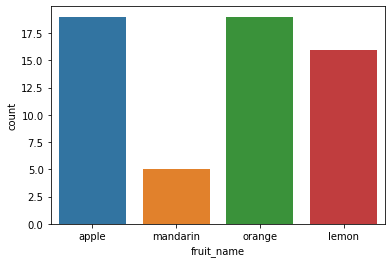

In [5]:
sns.countplot(fruits["fruit_name"], label = "Count")
plt.show()

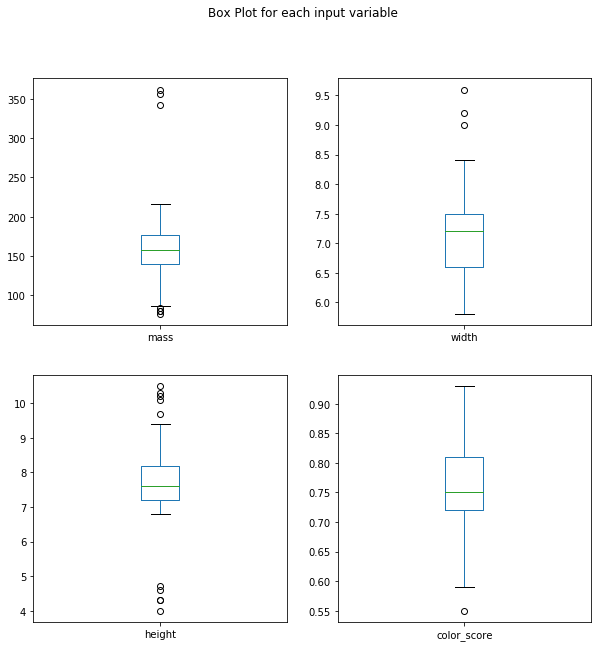

In [6]:
#Box plot para cada variável numérica fornece uma clara ideia da distribuição dos dados.

fruits.drop('fruit_label', axis=1).plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(10,10), title='Box Plot for each input variable')
plt.savefig('fruits_box')
plt.show()

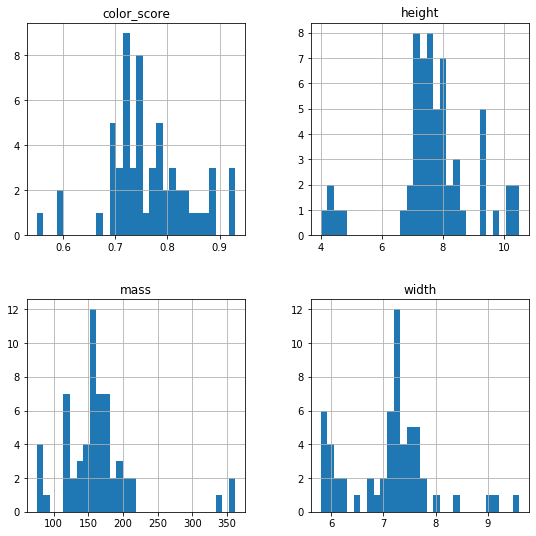

In [7]:
fruits.drop("fruit_label", axis = 1).hist(bins = 30, figsize = (9,9))
plt.show()

In [8]:
feature_names = ["mass", "width","height","color_score"]
X = fruits[feature_names]
y = fruits["fruit_label"]

In [9]:

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(x, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(10,10), cmap = cmap)

NameError: name 'x' is not defined

In [10]:
# forte correlação entre mass e width
fruits.corr() 

,fruit_label,mass,width,height,color_score
fruit_label,1.000000,0.032738,-0.298090,0.508766,-0.310521
mass,0.032738,1.000000,0.877687,0.609571,-0.079794
width,-0.298090,0.877687,1.000000,0.396848,-0.076576
height,0.508766,0.609571,0.396848,1.000000,-0.247047
color_score,-0.310521,-0.079794,-0.076576,-0.247047,1.000000


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 10)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [12]:

from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)

print('Accuracy of Logistic Regressor classifier on training set: {:.2f}'
     .format(log.score(X_train, y_train)))
print('Accuracy of Logistic Regressor classifier on test set: {:.2f}'
     .format(log.score(X_test, y_test)))

#print(confusion_matrix(y_test,y_pred))
#print(classification_report(y_test,sgd_cls.predict(X_test)))

Accuracy of Logistic Regressor classifier on training set: 0.70
Accuracy of Logistic Regressor classifier on test set: 0.40


In [13]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier().fit(X_train,y_train)
y_pred = dtc.predict(X_test)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(dtc.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(dtc.score(X_test, y_test)))

#print(confusion_matrix(y_test,y_pred))
#print(classification_report(y_test,sgd_cls.predict(X_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.67


In [14]:
def Classificador(metodo, dataframe, colunas, y, size = 0.3, neig = 5):
        
    X = dataframe[colunas]
    y = dataframe[y]
    print("Test size :{}".format(size))
    
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
    
    
    if metodo == "log":
        log = LogisticRegression()
        log.fit(X_train,y_train)
        print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(log.score(X_train, y_train)))
        print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(log.score(X_test, y_test)))
        print("Confusion Matrix:","\n" ,confusion_matrix(y_test,log.predict(X_test)),"\n")
        print("Classification Report:", "\n",classification_report(y_test,log.predict(X_test)))
    if metodo == "tree":
        dtc = DecisionTreeClassifier().fit(X_train,y_train)
        y_pred = dtc.predict(X_test)
        print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(dtc.score(X_train, y_train)))
        print('Accuracy of Decision Tree classifier on test set: {:.# Fit the model and predict X_test. Show some analysis.
   
    if metodo == "KNN":
        knn = KNeighborsClassifier(n_neighbors = neig)
        knn.fit(X_test,y_test)
        print('Accuracy of KNN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
        print('Accuracy of KNN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))
        print("Confusion Matrix:","\n" ,confusion_matrix(y_test,knn.predict(X_test)),"\n")
        print("Classification Report:", "\n",classification_report(y_test,knn.predict(X_test)))
    if metodo == "LDA":
        lda = LinearDiscriminantAnalysis()
        lda.fit(X_train, y_train)
        print('Accuracy of LDA classifier on training set: {:.2f}'.format(lda.score(X_train, y_train)))
        print('Accuracy of LDA classifier on test set: {:.2f}'.format(lda.score(X_test, y_test)))
        print("Confusion Matrix:","\n" ,confusion_matrix(y_test,lda.predict(X_test)),"\n")
        print("Classification Report:", "\n",classification_report(y_test,lda.predict(X_test)))        
        
    if metodo == "gauss":
        gnb = GaussianNB()
        gnb.fit(X_train, y_train)
        print('Accuracy of GNB classifier on training set: {:.2f}'.format(gnb.score(X_train, y_train)))
        print('Accuracy of GNB classifier on test set: {:.2f}'.format(gnb.score(X_test, y_test)))
        print("Confusion Matrix:","\n" ,confusion_matrix(y_test,gnb.predict(X_test)),"\n")
        print("Classification Report:", "\n",classification_report(y_test,gnb.predict(X_test)))
        
    if metodo == "SVM":
        svm = SVC()
        svm.fit(X_train, y_train)
        print('Accuracy of SVM classifier on training set: {:.2f}'.format(svm.score(X_train, y_train)))
        print('Accuracy of SVM classifier on test set: {:.2f}'.format(svm.score(X_test, y_test)))
        print("Confusion Matrix:","\n" ,confusion_matrix(y_test,svm.predict(X_test)),"\n")
        print("Classification Report:", "\n",classification_report(y_test,svm.predict(X_test)))
    
    

SyntaxError: EOL while scanning string literal (<ipython-input-14-5b64bcc5b15d>, line 24)

In [15]:
colunas = ["mass", "width","height","color_score"]
y = "fruit_label"
Classificador("log",fruits, colunas, y, size = 0.3)

NameError: name 'Classificador' is not defined

In [159]:
colunas = ["mass", "width","height","color_score"]
y = "fruit_label"
Classificador("KNN",fruits, colunas, y, size = 0.3, neig = 5)

Test size :0.3
Accuracy of KNN classifier on training set: 0.39
Accuracy of KNN classifier on test set: 0.73
Confusion Matrix: 
 [[3 0 1 0]
 [0 0 1 0]
 [0 0 8 0]
 [0 0 2 0]] 

Classification Report: 
               precision    recall  f1-score   support

           1       1.00      0.75      0.86         4
           2       0.00      0.00      0.00         1
           3       0.67      1.00      0.80         8
           4       0.00      0.00      0.00         2

    accuracy                           0.73        15
   macro avg       0.42      0.44      0.41        15
weighted avg       0.62      0.73      0.66        15



/home/gabrielmartins/miniconda3/envs/Aulas_AI2/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [160]:
colunas = ["mass", "width","height","color_score"]
y = "fruit_label"
Classificador("tree",fruits, colunas, y, size = 0.3)

Test size :0.3
Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.67
Confusion Matrix: 
 [[4 0 0 0]
 [0 1 0 0]
 [2 0 3 3]
 [0 0 0 2]] 

Classification Report: 
               precision    recall  f1-score   support

           1       0.67      1.00      0.80         4
           2       1.00      1.00      1.00         1
           3       1.00      0.38      0.55         8
           4       0.40      1.00      0.57         2

    accuracy                           0.67        15
   macro avg       0.77      0.84      0.73        15
weighted avg       0.83      0.67      0.65        15



In [161]:
colunas = ["mass", "width","height","color_score"]
y = "fruit_label"
Classificador("LDA",fruits, colunas, y, size = 0.3)

Test size :0.3
Accuracy of LDA classifier on training set: 0.86
Accuracy of LDA classifier on test set: 0.73
Confusion Matrix: 
 [[1 0 3 0]
 [0 1 0 0]
 [1 0 7 0]
 [0 0 0 2]] 

Classification Report: 
               precision    recall  f1-score   support

           1       0.50      0.25      0.33         4
           2       1.00      1.00      1.00         1
           3       0.70      0.88      0.78         8
           4       1.00      1.00      1.00         2

    accuracy                           0.73        15
   macro avg       0.80      0.78      0.78        15
weighted avg       0.71      0.73      0.70        15



In [162]:
colunas = ["mass", "width","height","color_score"]
y = "fruit_label"
Classificador("gauss",fruits, colunas, y, size = 0.3)

Test size :0.3
Accuracy of GNB classifier on training set: 0.86
Accuracy of GNB classifier on test set: 0.47
Confusion Matrix: 
 [[4 0 0 0]
 [0 1 0 0]
 [2 0 2 4]
 [0 0 2 0]] 

Classification Report: 
               precision    recall  f1-score   support

           1       0.67      1.00      0.80         4
           2       1.00      1.00      1.00         1
           3       0.50      0.25      0.33         8
           4       0.00      0.00      0.00         2

    accuracy                           0.47        15
   macro avg       0.54      0.56      0.53        15
weighted avg       0.51      0.47      0.46        15



In [163]:
colunas = ["mass", "width","height","color_score"]
y = "fruit_label"
Classificador("SVM",fruits, colunas, y, size = 0.3)

Test size :0.3
Accuracy of SVM classifier on training set: 0.91
Accuracy of SVM classifier on test set: 0.73
Confusion Matrix: 
 [[4 0 0 0]
 [0 1 0 0]
 [2 0 4 2]
 [0 0 0 2]] 

Classification Report: 
               precision    recall  f1-score   support

           1       0.67      1.00      0.80         4
           2       1.00      1.00      1.00         1
           3       1.00      0.50      0.67         8
           4       0.50      1.00      0.67         2

    accuracy                           0.73        15
   macro avg       0.79      0.88      0.78        15
weighted avg       0.84      0.73      0.72        15



In [165]:
 if metodo == "log":
        log = LogisticRegression()
        log.fit(X_train,y_train)
        print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(log.score(X_train, y_train)))
        print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(log.score(X_test, y_test)))
        print("Confusion Matrix:","\n" ,confusion_matrix(y_test,log.predict(X_test)),"\n")
        print("Classification Report:", "\n",classification_report(y_test,log.predict(X_test)))
    if metodo == "tree":
        dtc = DecisionTreeClassifier().fit(X_train,y_train)
        y_pred = dtc.predict(X_test)
        print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(dtc.score(X_train, y_train)))
        print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(dtc.score(X_test, y_test)))
        print("Confusion Matrix:","\n" ,confusion_matrix(y_test,dtc.predict(X_test)),"\n")
        print("Classification Report:", "\n",classification_report(y_test,dtc.predict(X_test)))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [174]:
log = LogisticRegression()
tree = DecisionTreeClassifier()

met = [log, tree]

for metod in met:
    metod.fit(X_train,y_train)
    y_pred = metod.predict(X_test)
    print("\n")
    print("Accurancy for train of {}".format(metod.score(X_train,y_train)))
    print('Accuracy  for test of {}'.format(metod.score(X_test, y_test)))
    print("Confusion Matrix:","\n" ,confusion_matrix(y_test,metod.predict(X_test)),"\n")
    print("Classification Report:", "\n",classification_report(y_test,metod.predict(X_test)))
    print("\n")
    



Accurancy for train of 0.7045454545454546
Accuracy  for test of 0.4
Confusion Matrix: 
 [[4 0 0 1]
 [2 0 0 0]
 [2 0 1 4]
 [0 0 0 1]] 

Classification Report: 
               precision    recall  f1-score   support

           1       0.50      0.80      0.62         5
           2       0.00      0.00      0.00         2
           3       1.00      0.14      0.25         7
           4       0.17      1.00      0.29         1

    accuracy                           0.40        15
   macro avg       0.42      0.49      0.29        15
weighted avg       0.64      0.40      0.34        15





Accurancy for train of 1.0
Accuracy  for test of 0.6666666666666666
Confusion Matrix: 
 [[3 0 2 0]
 [0 2 0 0]
 [0 0 4 3]
 [0 0 0 1]] 

Classification Report: 
               precision    recall  f1-score   support

           1       1.00      0.60      0.75         5
           2       1.00      1.00      1.00         2
           3       0.67      0.57      0.62         7
           4       0.2

/home/gabrielmartins/miniconda3/envs/Aulas_AI2/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
